# Diving deep into Disease to understand the problem

## What is Parkinson Disease?
Ans. Parkinson's disease is a chronic and progressive neurological disorder that affects movement. It is caused by the degeneration of dopamine-producing neurons in a region of the brain called the substantia nigra. Dopamine is a neurotransmitter that plays a crucial role in controlling movement, so the loss of dopamine-producing neurons leads to a disruption in the normal movement of the body.

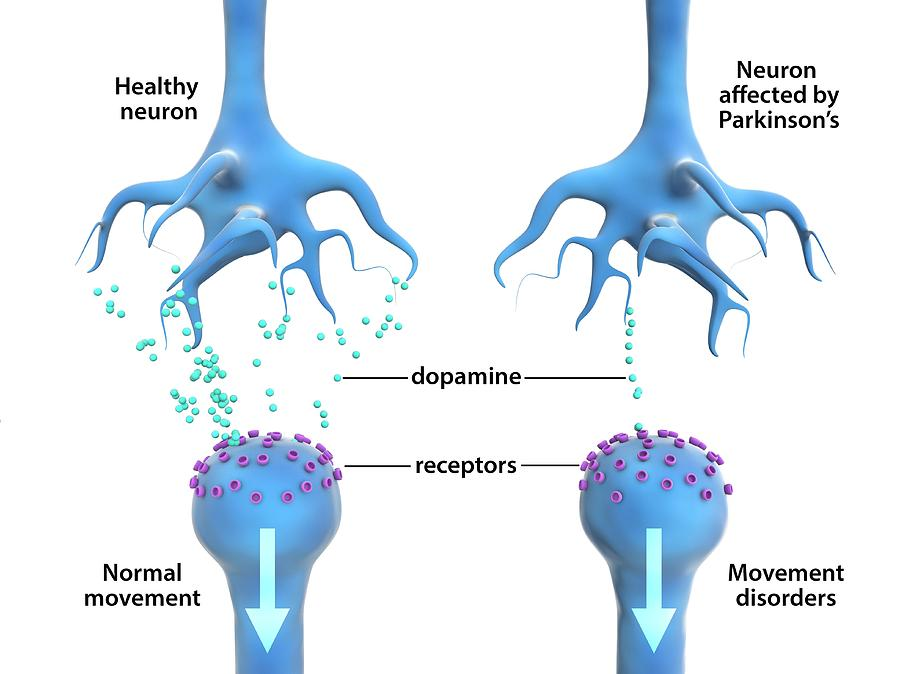

The symptoms of Parkinson's disease include tremors or shaking, slowness of movement, stiffness, and difficulty with balance and coordination. Other symptoms may include a loss of smell, sleep problems, depression, and cognitive changes such as memory loss and difficulty with reasoning.

![Alt Text](Images_related_to_Parkinson_project\i21.png)


## Cause of the Disease?
Ans. The exact cause of Parkinson's disease is not known, but it is believed to involve a combination of genetic and environmental factors. There is currently no cure for Parkinson's disease, but treatment options are available to help manage the symptoms. These treatments may include medication, such as levodopa, which can help to increase dopamine levels in the brain, or deep brain stimulation, a surgical procedure that can help to control tremors and other symptoms.

## Can early detection really help the patient?
Ans. Early detection and treatment of Parkinson's disease can help to improve quality of life and slow the progression of the disease. If you are experiencing any symptoms of Parkinson's disease, it is important to speak with a healthcare professional for evaluation and diagnosis.

## Relationship between Parkinson Disease and Patients protein and peptide levels?
Ans. There is evidence to suggest that protein and peptides may play a role in the development and progression of Parkinson's disease.

In Parkinson's disease, abnormal protein deposits called Lewy bodies form in the brain. These Lewy bodies contain clumps of a protein called alpha-synuclein. It is believed that the accumulation of alpha-synuclein in the brain contributes to the death of dopamine-producing neurons and the development of Parkinson's disease.

Research has also suggested that certain peptides, such as beta-amyloid and tau, may play a role in the development of Parkinson's disease. These peptides are known to accumulate in the brains of individuals with Alzheimer's disease, and there is some evidence to suggest that they may also contribute to the development of Parkinson's disease.

Additionally, there is research being conducted to investigate the potential use of peptides as a therapeutic approach for Parkinson's disease. For example, one study is looking at the use of a peptide called NAP to protect dopamine-producing neurons from damage and slow the progression of Parkinson's disease.

Overall, the relationship between Parkinson's disease and protein and peptides is complex and still not fully understood. However, ongoing research is providing important insights into the underlying mechanisms of the disease and potential treatment approaches.


# Introduction to this Notebook
Welcome to the AMP - Parkinson's Disease Progression Prediction.


![Alt Text](Images_related_to_Parkinson_project\i1.png)


## Purpose
The purpose of this notebook is to take a deep dive into the dataset provided and understand some of the general trends and features that occur in the supplied source datafiles. This particular notebook is broken into five parts:

(i.)EDA 

(ii.)preparing dataset 

(iii.)Build a baseline model with ready dataset

(iv.)Try various machine learning models

(v.)Conclusion and References


![Alt Text](Images_related_to_Parkinson_project\i2.png)


## Goal of this project
we are looking at the Unified Parkinson's Disease Rating Scale (UPDRS) that was revised by the Movement Disorder Society (MDS) in 2008. This new scale - the MDS-UPDRS (which we will refer to within this EDA as simply the UPDRS) - consists of 4 separate parts. Each part consists of a questionnaire that rates signs or symptoms of Parkinson's Disease (PD). According to Holden et al (2018), the individual parts consist of:

Part I - Non-Motor Aspects of Experiences of Daily Living

Part II - Motor Aspects of Experiences of Daily Living

Part III - Motor Examination

Part IV - Motor Complications

Questions within each part are scored on a 5 point scale ranging in values from 0 (normal) to 4 (most severe impairment). The maximum score that a patient may be assigned is 272 points. The challenge in this competition is to predict the UPDRS scores for parts 1 - 4 for each month that the patient had a visit and evaluation with a physician.


## Ques. What does [0-4] scale in UPRDS mean?
![Alt Text](Images_related_to_Parkinson_project\i15.png)

## Sample of UPRDS scorecard
![Alt Text](Images_related_to_Parkinson_project\i16.png)


# 1.EDA (Exploratory Data Analysis)

Before proceeding, let's examine the memory and disk usage, as these factors may pose constraints on our ability to perform certain tasks.

![Alt Text](Images_related_to_Parkinson_project\i4.png)

The dataset includes information obtained from mass spectrometry readings of cerebrospinal fluid (CSF) proteins and peptides. However, some of the data points do not have CSF readings available. The columns provide details on both the frequency of protein expression within the CSF and the associated peptide frequencies (peptides being the subunits of proteins). Before proceeding, let's take a quick look at the column headers to better understand the contents of the dataset.

![Alt Text](Images_related_to_Parkinson_project\i5.png)
![Alt Text](Images_related_to_Parkinson_project\i6.png)

In [1]:
#importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc # garbage collection that automatically frees up memory that is no longer being used

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

#importing the files
train_clinical_data = pd.read_csv("train_clinical_data.csv")
train_peptides = pd.read_csv("train_peptides.csv")
train_protiens = pd.read_csv("train_proteins.csv")
supplemental_clinical_data = pd.read_csv("supplemental_clinical_data.csv")

In [2]:
train_clinical_data

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
...,...,...,...,...,...,...,...,...
2610,65043_48,65043,48,7.0,6.0,13.0,0.0,Off
2611,65043_54,65043,54,4.0,8.0,11.0,1.0,Off
2612,65043_60,65043,60,6.0,6.0,16.0,1.0,Off
2613,65043_72,65043,72,3.0,9.0,14.0,1.0,Off


In [3]:
print(": Found {:,d} unique patient_id values".format(train_clinical_data["patient_id"].nunique()))
print(": Found {:,d} unique visit_month values".format(train_clinical_data["visit_month"].nunique()))

: Found 248 unique patient_id values
: Found 17 unique visit_month values


In [4]:
train_peptides

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.30
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.00
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.00
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.70
...,...,...,...,...,...,...
981829,58648_108,108,58648,Q9UHG2,ILAGSADSEGVAAPR,202820.00
981830,58648_108,108,58648,Q9UKV8,SGNIPAGTTVDTK,105830.00
981831,58648_108,108,58648,Q9Y646,LALLVDTVGPR,21257.60
981832,58648_108,108,58648,Q9Y6R7,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26


In [5]:
print(": Found {:,d} unique patient_id values".format(train_peptides["patient_id"].nunique()))
print(": Found {:,d} unique UniProt values".format(train_peptides["UniProt"].nunique()))
print(": Found {:,d} unique Peptide values".format(train_peptides["Peptide"].nunique()))

: Found 248 unique patient_id values
: Found 227 unique UniProt values
: Found 968 unique Peptide values


In [6]:
train_protiens

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0
...,...,...,...,...,...
232736,58648_108,108,58648,Q9UBX5,27387.8
232737,58648_108,108,58648,Q9UHG2,369437.0
232738,58648_108,108,58648,Q9UKV8,105830.0
232739,58648_108,108,58648,Q9Y646,21257.6


In [7]:
print(": Found {:,d} unique patient_id values".format(train_protiens["patient_id"].nunique()))
print(": Found {:,d} unique visit_month values".format(train_protiens["visit_month"].nunique()))
print(": Found {:,d} unique UniProt values".format(train_protiens["UniProt"].nunique()))

: Found 248 unique patient_id values
: Found 15 unique visit_month values
: Found 227 unique UniProt values


In [8]:
supplemental_clinical_data

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,35_0,35,0,5.0,3.0,16.0,0.0,NaN
1,35_36,35,36,6.0,4.0,20.0,0.0,NaN
2,75_0,75,0,4.0,6.0,26.0,0.0,NaN
3,75_36,75,36,1.0,8.0,38.0,0.0,On
4,155_0,155,0,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
2218,65382_0,65382,0,NaN,NaN,0.0,NaN,NaN
2219,65405_0,65405,0,5.0,16.0,31.0,0.0,NaN
2220,65405_5,65405,5,NaN,NaN,57.0,NaN,NaN
2221,65530_0,65530,0,10.0,6.0,24.0,0.0,NaN


In [9]:
print(": Found {:,d} unique patient_id values".format(supplemental_clinical_data["patient_id"].nunique()))
print(": Found {:,d} unique visit_month values".format(supplemental_clinical_data["visit_month"].nunique()))

: Found 771 unique patient_id values
: Found 8 unique visit_month values


In [10]:
combined = pd.concat([train_clinical_data, supplemental_clinical_data]).reset_index(drop=True)
combined

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
...,...,...,...,...,...,...,...,...
4833,65382_0,65382,0,NaN,NaN,0.0,NaN,NaN
4834,65405_0,65405,0,5.0,16.0,31.0,0.0,NaN
4835,65405_5,65405,5,NaN,NaN,57.0,NaN,NaN
4836,65530_0,65530,0,10.0,6.0,24.0,0.0,NaN


In [11]:
print(": Found {:,d} unique patient_id values".format(combined["patient_id"].nunique()))
print(": Found {:,d} unique visit_month values".format(combined["visit_month"].nunique()))

: Found 1,019 unique patient_id values
: Found 18 unique visit_month values


## 1.(i) Some key impressions:

![Alt Text](Images_related_to_Parkinson_project\i7.png)
![Alt Text](Images_related_to_Parkinson_project\i8.png)

## 1.(ii). NULL Values

Let's explore the issue of missing values in the dataset to see if there are systemic problems with data representation.

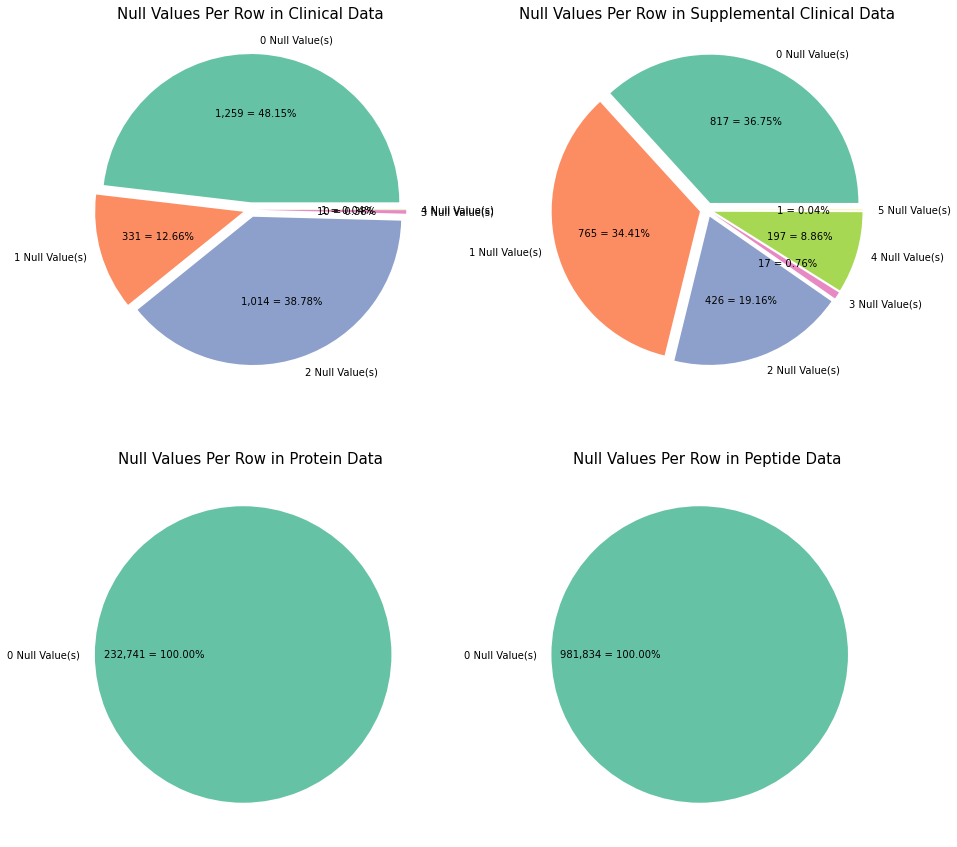

In [12]:
#count of null values present in each row
train_clinical_data["null_count"] = train_clinical_data.isnull().sum(axis=1) 
#This code creates a dictionary called counts_train_clinical_data that groups the train_clinical_data dataframe by the 
#number of null values in each row, and counts how many rows have each number of null values. 
counts_train_clinical_data = train_clinical_data.groupby("null_count")["visit_id"].count().to_dict()
null_train_clinical_data = {"{} Null Value(s)".format(k) : v for k, v in counts_train_clinical_data.items()}


train_peptides["null_count"] = train_peptides.isnull().sum(axis=1)
counts_train_peptides = train_peptides.groupby("null_count")["visit_id"].count().to_dict()
null_train_peptides = {"{} Null Value(s)".format(k) : v for k, v in counts_train_peptides.items()}


train_protiens["null_count"] = train_protiens.isnull().sum(axis=1)
counts_train_protiens = train_protiens.groupby("null_count")["visit_id"].count().to_dict()
null_train_protiens = {"{} Null Value(s)".format(k) : v for k, v in counts_train_protiens.items()}


supplemental_clinical_data["null_count"] = supplemental_clinical_data.isnull().sum(axis=1)
counts_supplemental_clinical_data = supplemental_clinical_data.groupby("null_count")["visit_id"].count().to_dict()
null_supplemental_clinical_data = {"{} Null Value(s)".format(k) : v for k, v in counts_supplemental_clinical_data.items()}


fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))


axs = axs.flatten()


_ = axs[0].pie(
    x=list(null_train_clinical_data.values()), 
    autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(null_train_clinical_data.values())/100, x),
    explode=[0.05] * len(null_train_clinical_data.keys()), 
    labels=null_train_clinical_data.keys(), 
    colors=sns.color_palette("Set2")[0:len(null_train_clinical_data.keys())],
)

_ = axs[0].set_title("Null Values Per Row in Clinical Data", fontsize=15)

_ = axs[3].pie(
    x=list(null_train_peptides.values()), 
    autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(null_train_peptides.values())/100, x),
    explode=[0.05] * len(null_train_peptides.keys()), 
    labels=null_train_peptides.keys(), 
    colors=sns.color_palette("Set2")[0:len(null_train_peptides.keys())],
)

_ = axs[3].set_title("Null Values Per Row in Peptide Data", fontsize=15)

_ = axs[2].pie(
    x=list(null_train_protiens.values()), 
    autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(null_train_protiens.values())/100, x),
    explode=[0.05] * len(null_train_protiens.keys()), 
    labels=null_train_protiens.keys(), 
    colors=sns.color_palette("Set2")[0:len(null_train_protiens.keys())],
)

_ = axs[2].set_title("Null Values Per Row in Protein Data", fontsize=15)

_ = axs[1].pie(
    x=list(null_supplemental_clinical_data.values()), 
    autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(null_supplemental_clinical_data.values())/100, x),
    explode=[0.05] * len(null_supplemental_clinical_data.keys()), 
    labels=null_supplemental_clinical_data.keys(), 
    colors=sns.color_palette("Set2")[0:len(null_supplemental_clinical_data.keys())],
)

_ = axs[1].set_title("Null Values Per Row in Supplemental Clinical Data", fontsize=15)

Fortunately, there are no missing values in the CSF observations using the peptide and protein data. However, null values are present in the clinical data. We need to investigate which values are missing and the possible reasons for their absence. Let's begin by examining the clinical data.

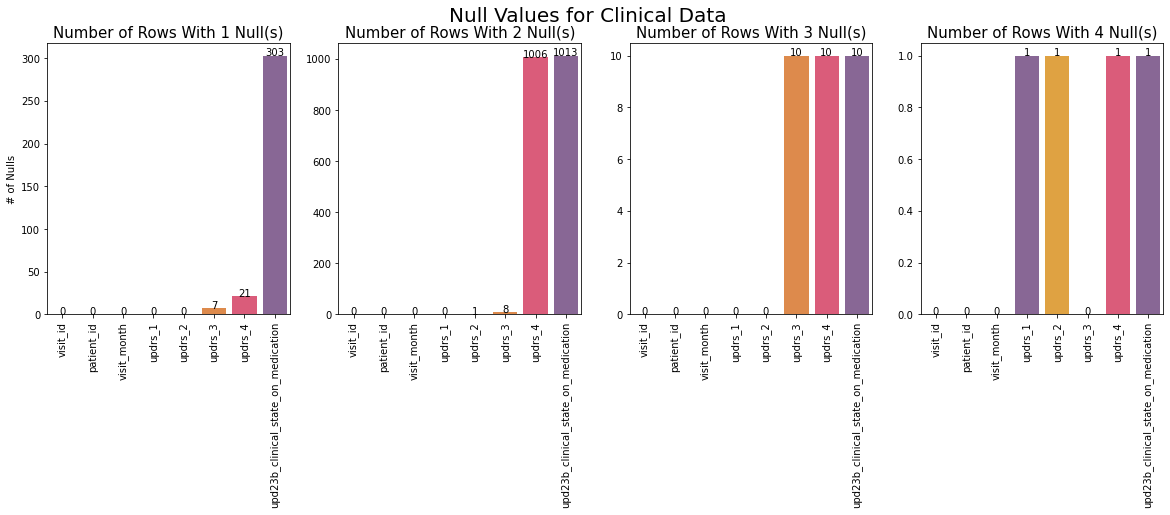

In [13]:
null_count_labels = [train_clinical_data[(train_clinical_data["null_count"] == x)].isnull().sum().index[:-1] for x in range(1, 6)]
null_count_values = [train_clinical_data[(train_clinical_data["null_count"] == x)].isnull().sum().values[:-1] for x in range(1, 6)]

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
fig.suptitle("Null Values for Clinical Data", fontsize=20)

axs = axs.flatten()

colors = ["#F9A828", "#F58634", "#EF476F", "#8B5F9D"]

for x in range(0, 4):
    ax = axs[x]
    labels = null_count_labels[x]
    _ = sns.barplot(x=labels, y=null_count_values[x], ax=ax, palette=colors)
    _ = ax.set_title("Number of Rows With {} Null(s)".format(x + 1), fontsize=15)
    _ = ax.set_ylabel("# of Nulls" if x == 0 else "")
    _ = ax.set_xlabel("")
    _ = ax.set_xticks([z for z in range(len(labels))], labels, rotation=90)
    for p in ax.patches:
        height = p.get_height()
        ax.text(x=p.get_x()+(p.get_width()/2), y=height, s="{:d}".format(int(height)), ha="center")


# Lets boil our observations analyzing these trends :

## Rows with 1 Null Value
When a row contains only one null value, it is typically in the feature "upd23b_clinical_state_on_medication," which should have a value of either "On" or "Off." A null value in this field can be interpreted in two ways: the patient may have been off medication at the time of assessment, or the assessment may have failed to capture the patient's medication status. There are also 7 null values in the "updrs_3" column and 21 null values in the "updrs_4" column. According to Goetz et al (2008), "updrs_3" assesses motor function and "updrs_4" assesses motor complications, both with a minimum score of 0. A null value in either column suggests that the assessment was not performed, which is important because a score of 0 indicates that the patient was assessed and had normal responses.

## Rows with 2 Null Values
When a row has two null values, they usually correspond to updrs_4 and upd23b_clinical_state_on_medication. As valid responses for the medication status field are limited to On or Off, a null value in this column is of interest as it is unclear whether the medication status was not recorded or if the patient was not taking any medication. The majority of other null values are found in the updrs_4 field, which assesses motor complications, while updrs_3 and updrs_2 have few null values. However, a null value in updrs_3 cannot be assumed to be a score of 0 as this indicates normal function. Similarly, null values in updrs_2 may indicate that the assessment was not performed.

## Rows with 3 Null Values
In 10 cases, rows have 3 null values, which correspond to missing information in updrs_3, updrs_4, and upd23b_clinical_state_on_medication. It should be noted that the missing values cannot be considered as 0 values.


## Rows with 4 Null Values
There is only one row in the dataset where four features contain null values. This suggests that only the UPDRS part 3 assessment was conducted during the visit, as the other features with null values correspond to motor complications and medication status. It is important to note that null values cannot be assumed to have a value of 0, as a score of 0 indicates normal function.

It is important to examine the supplementary information for any null values.

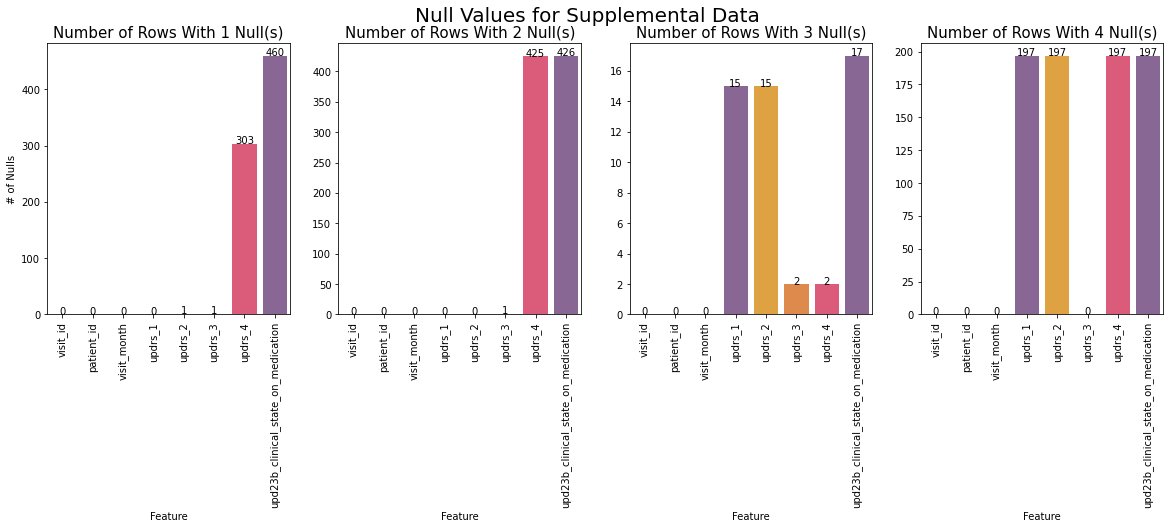

In [14]:
null_count_labels = [supplemental_clinical_data[(supplemental_clinical_data["null_count"] == x)].isnull().sum().index[:-1] for x in range(1, 6)]
null_count_values = [supplemental_clinical_data[(supplemental_clinical_data["null_count"] == x)].isnull().sum().values[:-1] for x in range(1, 6)]

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
fig.suptitle("Null Values for Supplemental Data", fontsize=20)

axs = axs.flatten()

colors = ["#F9A828", "#F58634", "#EF476F", "#8B5F9D"]

for x in range(0, 4):
    ax = axs[x]
    labels = null_count_labels[x]
    _ = sns.barplot(x=labels, y=null_count_values[x], ax=ax , palette = colors)
    _ = ax.set_title("Number of Rows With {} Null(s)".format(x + 1), fontsize=15)
    _ = ax.set_ylabel("# of Nulls" if x == 0 else "")
    _ = ax.set_xlabel("Feature")
    _ = ax.set_xticks([z for z in range(len(labels))], labels, rotation=90)
    for p in ax.patches:
        height = p.get_height()
        ax.text(x=p.get_x()+(p.get_width()/2), y=height, s="{:d}".format(int(height)), ha="center")


Similar patterns are observed in the supplemental data as well, where single null values usually appear in updrs_4 and upd23b_clinical_state_on_medication. Likewise, rows with two null values also exhibit a similar trend. However, when there are three null values, the supplemental data shows a slightly different trend compared to the clinical data, with updrs_1 and updrs_2 being more likely to be missing. Moreover, rows with four null values in the supplemental data have the same missing values as in updrs_1, updrs_2, updrs_4, and upd23b_clinical_state_on_medication. Interestingly, the number of rows with four null values is significantly higher in the supplemental data compared to the clinical data.


## Some key impressions :


![Alt Text](Images_related_to_Parkinson_project\i9.png)



## 1.(iii). Duplicated Rows
We should next check to see if we have any duplicated values in our various datasets. Duplicates may impact our learning methods, resulting in prediction bias toward the duplicate information.

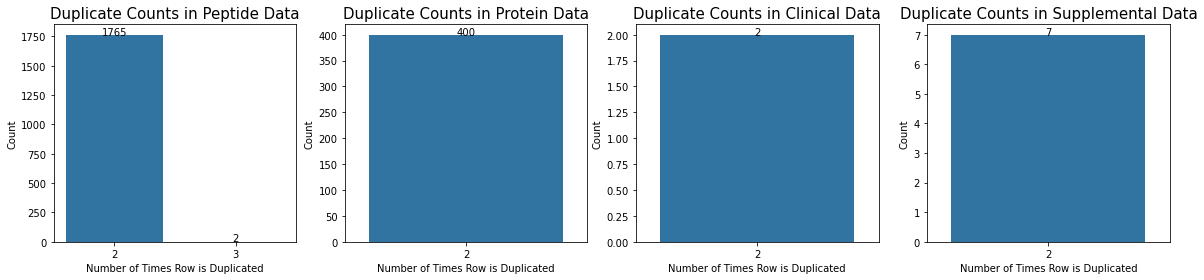

In [15]:
# Define the titles of the datasets
dataset_titles = ["Peptide Data", "Protein Data", "Clinical Data", "Supplemental Data"]

# Initialize a list to store the count of duplicates in each dataset
duplicate_counts = []

# Count the number of times each row is duplicated in the peptide data
peptide_duplicates = train_peptides.pivot_table(index=[
    'UniProt', 'Peptide', 'PeptideAbundance',
], aggfunc="size")
unique, counts = np.unique(peptide_duplicates, return_counts=True)
duplicate_counts.append(dict(zip(unique, counts)))

# Count the number of times each row is duplicated in the protein data
protein_duplicates = train_protiens.pivot_table(index=[
    'UniProt', 'NPX',
], aggfunc="size")
unique, counts = np.unique(protein_duplicates, return_counts=True)
duplicate_counts.append(dict(zip(unique, counts)))

# Count the number of times each row is duplicated in the clinical data
clinical_duplicates = train_clinical_data.pivot_table(index=[
    'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4', 'upd23b_clinical_state_on_medication'
], aggfunc="size")
unique, counts = np.unique(clinical_duplicates, return_counts=True)
duplicate_counts.append(dict(zip(unique, counts)))

# Count the number of times each row is duplicated in the supplemental clinical data
supplemental_duplicates = supplemental_clinical_data.pivot_table(index=[
    'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4', 'upd23b_clinical_state_on_medication'
], aggfunc="size")
unique, counts = np.unique(supplemental_duplicates, return_counts=True)
duplicate_counts.append(dict(zip(unique, counts)))

# Create a bar plot to display the count of duplicate rows for each dataset
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

# Flatten the subplot axes into a 1D array
axs = axs.flatten()

for i in range(len(dataset_titles)):
    # Get the current axis
    ax = axs[i]
    
    # Create a bar plot of the duplicate counts for the current dataset
    _ = sns.barplot(x=list(duplicate_counts[i].keys())[1:], y=list(duplicate_counts[i].values())[1:], ax=ax)
    
    # Set the title, labels, and text for each plot
    _ = ax.set_title("Duplicate Counts in {}".format(dataset_titles[i]), fontsize=15)
    _ = ax.set_ylabel("Count")
    _ = ax.set_xlabel("Number of Times Row is Duplicated")
    for p in ax.patches:
        height = p.get_height()
        ax.text(x=p.get_x()+(p.get_width()/2), y=height, s="{:d}".format(int(height)), ha="center")


## Some key impressions :


![Alt Text](Images_related_to_Parkinson_project\i10.png)


# 1.(iv). Statistical Breakdown
Let's take a closer look at some of the statistical properties of the continuous features.


## 1.(iv).(a) Clinical vs Supplemental Data
To begin, let's compare the clinical data to the supplemental data to see what kind of differences we have.



In [16]:
features = [
    'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4',
]

train_clinical_data[features].describe().T.style.bar(subset=['mean'], color='#7BCC70')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
visit_month,2615.000000,31.190822,25.199053,0.000000,10.500000,24.000000,48.000000,108.000000
updrs_1,2614.000000,7.110559,5.525955,0.000000,3.000000,6.000000,10.000000,33.000000
updrs_2,2613.000000,6.743590,6.323230,0.000000,1.000000,5.000000,10.000000,40.000000
updrs_3,2590.000000,19.421236,15.000289,0.000000,6.000000,19.000000,29.000000,86.000000
updrs_4,1577.000000,1.861763,3.022112,0.000000,0.000000,0.000000,3.000000,20.000000


## Supplemental Data

In [17]:
features = [
    'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4',
]

supplemental_clinical_data[features].describe().T.style.bar(subset=['mean'], color='#7BCC70')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')


,count,mean,std,min,25%,50%,75%,max
visit_month,2223.000000,12.910481,13.060532,0.000000,0.000000,6.000000,24.000000,36.000000
updrs_1,2010.000000,5.684080,4.366964,0.000000,2.000000,5.000000,8.000000,27.000000
updrs_2,2009.000000,6.507715,4.968132,0.000000,2.000000,5.000000,10.000000,34.000000
updrs_3,2218.000000,22.917944,12.342596,0.000000,14.000000,22.000000,31.000000,72.000000
updrs_4,1295.000000,0.840154,1.860247,0.000000,0.000000,0.000000,0.000000,12.000000



Supplemental data appears to have visits that occur mainly between 0 and 36 months, while clinical data shows visits occurring between 0 and 108 months. We can confirm this by looking at kernel density estimates for the months of the various visits.

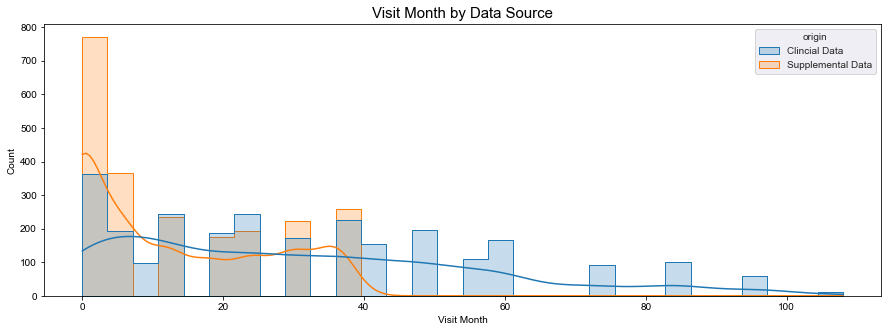

In [18]:
train_clinical_data["origin"] = "Clincial Data"
supplemental_clinical_data["origin"] = "Supplemental Data"

combined = pd.concat([train_clinical_data, supplemental_clinical_data]).reset_index(drop=True)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.set_style('darkgrid')

_ = sns.histplot(data=combined, x="visit_month", hue="origin", kde=True, ax=ax, element="step")
_ = ax.set_title("Visit Month by Data Source", fontsize=15)
_ = ax.set_ylabel("Count")
_ = ax.set_xlabel("Visit Month")


As we can see, the supplemental data is focused around 0 month visits, and ends at 36 months, while the clinical data spans a much longer time-frame. We can also do a quick visual check to see if there are differences between the clinical and supplemental data when it comes to UPDRS scores. For the figures below, the trend lines are kernel density estimates, thus differences in raw counts are taken into consideration with the trend lines.

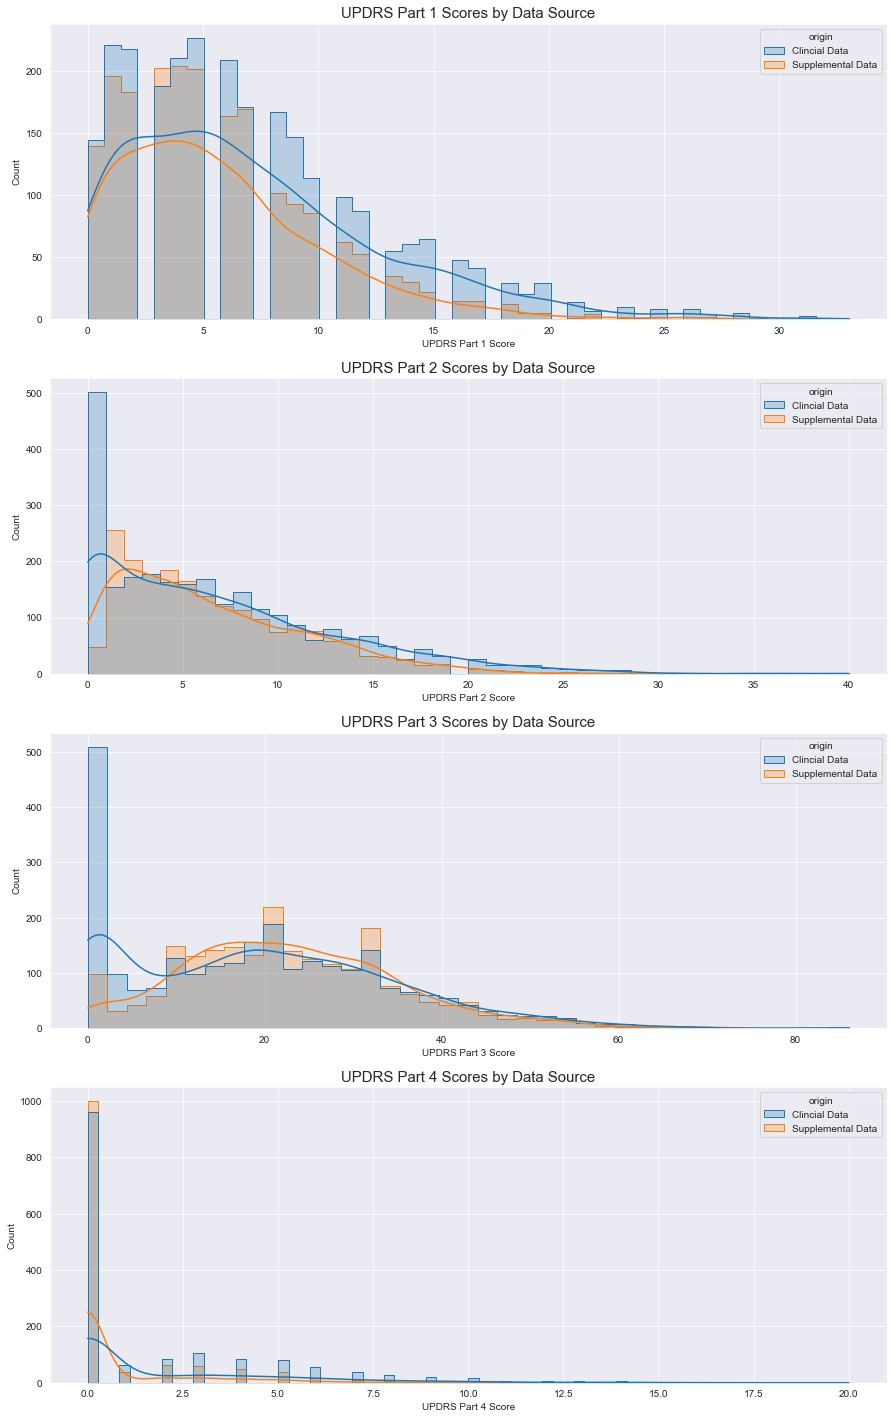

In [19]:
train_clinical_data["origin"] = "Clincial Data"
supplemental_clinical_data["origin"] = "Supplemental Data"

combined = pd.concat([train_clinical_data, supplemental_clinical_data]).reset_index(drop=True)

features = ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]
labels = ["UPDRS Part 1", "UPDRS Part 2", "UPDRS Part 3", "UPDRS Part 4"]

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 25))

sns.set_style('darkgrid')

axs = axs.flatten()

sns.set_style('darkgrid')

for x, feature in enumerate(features):
    ax = axs[x]
    _ = sns.histplot(data=combined, x=feature, hue="origin", kde=True, ax=ax, element="step")
    _ = ax.set_title("{} Scores by Data Source".format(labels[x]), fontsize=15)
    _ = ax.set_ylabel("Count")
    _ = ax.set_xlabel("{} Score".format(labels[x]))


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


-------> Fold 1 <--------
: AUC ROC = 0.93284295239891
-------> Fold 2 <--------
: AUC ROC = 0.9443979556368038
-------> Fold 3 <--------
: AUC ROC = 0.927000150024647
-------> Fold 4 <--------
: AUC ROC = 0.9435134052227236
-------> Fold 5 <--------
: AUC ROC = 0.9532604768786127
--> Overall results for out of fold predictions
: AUC ROC = 0.9389806206451068


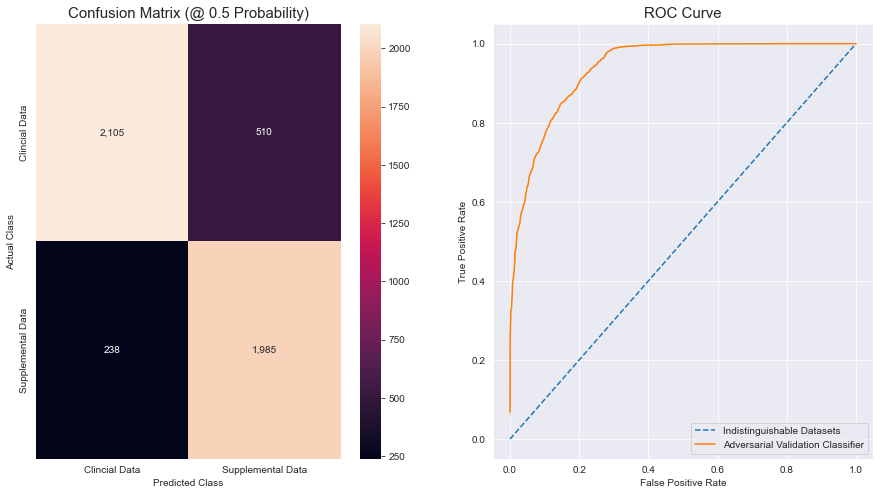

In [20]:
!pip install lightgbm

from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
from lightgbm import early_stopping, log_evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder

train_clinical_data["origin"] = 0
supplemental_clinical_data["origin"] = 1

combined = pd.concat([train_clinical_data, supplemental_clinical_data]).reset_index(drop=True)

features = [
    'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4', 'upd23b_clinical_state_on_medication',
]

le = LabelEncoder()
combined['upd23b_clinical_state_on_medication'] = le.fit_transform(combined['upd23b_clinical_state_on_medication'])
    
n_folds = 5
skf = KFold(n_splits=n_folds, random_state=2023, shuffle=True)
train_oof_preds = np.zeros((combined.shape[0],))
train_oof_probas = np.zeros((combined.shape[0],))

for fold, (train_index, test_index) in enumerate(skf.split(combined, combined["origin"])):
    print("-------> Fold {} <--------".format(fold + 1))
    x_train, x_valid = pd.DataFrame(combined.iloc[train_index]), pd.DataFrame(combined.iloc[test_index])
    y_train, y_valid = combined["origin"].iloc[train_index], combined["origin"].iloc[test_index]
    
    x_train_features = pd.DataFrame(x_train[features])
    x_valid_features = pd.DataFrame(x_valid[features])

    model = LGBMClassifier(
        random_state=2023,
        objective="binary",
        metric="auc",
        n_jobs=-1,
        n_estimators=2000,
        verbose=-1,  
        max_depth=3,
    )
    model.fit(
        x_train_features[features], 
        y_train,
        eval_set=[(x_valid_features[features], y_valid)],
        callbacks=[
            early_stopping(50, verbose=False),
            log_evaluation(2000),
        ]
    )
    oof_preds = model.predict(x_valid_features[features])
    oof_probas = model.predict_proba(x_valid_features[features])[:,1]
    train_oof_preds[test_index] = oof_preds
    train_oof_probas[test_index] = oof_probas
    print(": AUC ROC = {}".format(roc_auc_score(y_valid, oof_probas)))
    
auc_vanilla = roc_auc_score(combined["origin"], train_oof_probas)
fpr, tpr, _ = roc_curve(combined["origin"], train_oof_probas)
print("--> Overall results for out of fold predictions")
print(": AUC ROC = {}".format(auc_vanilla))

confusion = confusion_matrix(combined["origin"], train_oof_preds)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

labels = ["Clincial Data", "Supplemental Data"]

_ = sns.heatmap(confusion, annot=True, fmt=",d", ax=axs[0], xticklabels=labels, yticklabels=labels)
_ = axs[0].set_title("Confusion Matrix (@ 0.5 Probability)", fontsize=15)
_ = axs[0].set_ylabel("Actual Class")
_ = axs[0].set_xlabel("Predicted Class")

_ = sns.lineplot(x=[0, 1], y=[0, 1], linestyle="--", label="Indistinguishable Datasets", ax=axs[1])
_ = sns.lineplot(x=fpr, y=tpr, ax=axs[1], label="Adversarial Validation Classifier")
_ = axs[1].set_title("ROC Curve", fontsize=15)
_ = axs[1].set_xlabel("False Positive Rate")
_ = axs[1].set_ylabel("True Positive Rate")


The obtained AUC ROC score of 0.939 indicates that the classifier could accurately distinguish between the two datasets, which implies that the datasets are markedly dissimilar as stated. Therefore, it is advisable to exercise caution while combining these datasets, given their significant differences in nature.


## 1.(iv).(b) Protein Data

Let's take a look at the values we have for protein data.


In [21]:
train_protiens[["NPX"]].describe().T.style.bar(subset=['mean'], color='#7BCC70')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')


,count,mean,std,min,25%,50%,75%,max
NPX,232741.000000,2712076.943823,22241547.317363,84.608200,29464.400000,113556.000000,563894.000000,613851000.000000


The frequency values for protein expression are observed to be widely spread out. To get a better understanding of where these frequencies are concentrated, we will utilize a kernel density estimate, which will be computed on a logarithmic scale, given the large range and potential variance in the expression frequencies.

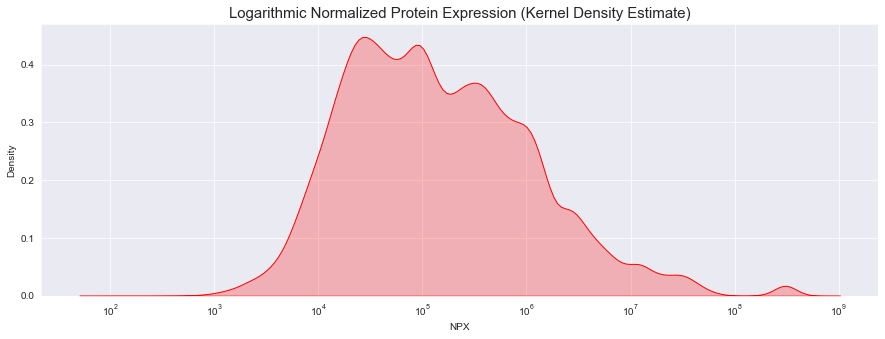

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.set_style('darkgrid')

_ = sns.kdeplot(train_protiens["NPX"], shade=True, color="r", ax=ax, label="Normalized Protein Expression", log_scale=True)
_ = ax.set_title("Logarithmic Normalized Protein Expression (Kernel Density Estimate)", fontsize=15)


The protein expression frequencies display a high degree of variability, as evident from the range of values observed. We will delve deeper into the distribution of protein frequencies and their correlation with the UPDRS scores in the next section. Currently, it is important to note that the normalized protein expression levels exhibit significant variability, which can be inferred from the minimum and maximum values as well as the standard deviation of the feature.

## 1.(iv).(c)  Peptide Data¶
Let's take a look at what we have for the peptide data.



In [23]:
train_peptides[["PeptideAbundance"]].describe().T.style.bar(subset=['mean'], color='#7BCC70')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')


,count,mean,std,min,25%,50%,75%,max
PeptideAbundance,981834.000000,642890.245933,3377989.092586,10.998500,28174.250000,74308.300000,221338.750000,178752000.000000


Once more, there is noticeable variation in the abundance of peptides, as evidenced by the range of values in the min, max, and standard deviation of this feature. This suggests that the abundance of peptides can differ significantly across various peptides. To gain insight into the distribution of these values, we can utilize kernel density estimates.

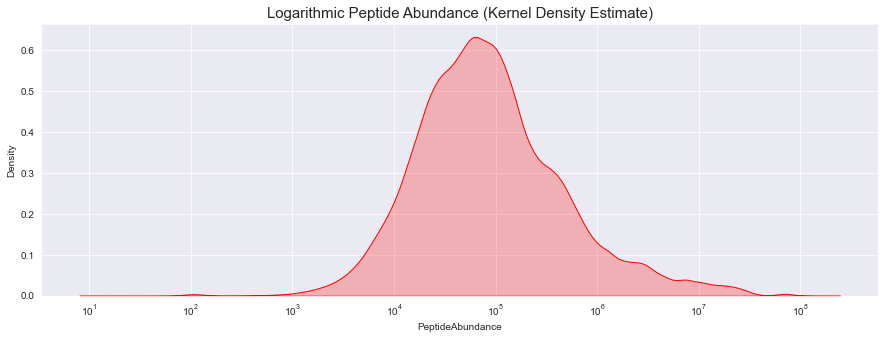

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.set_style('darkgrid')

_ = sns.kdeplot(train_peptides["PeptideAbundance"], shade=True, color="r", ax=ax, label="Peptide Abundance", log_scale=True)
_ = ax.set_title("Logarithmic Peptide Abundance (Kernel Density Estimate)", fontsize=15)



Once again, we'll look at peptide data - specifically peptide sequences and how they relate to UPDRS scores - in section 2 below.

## Key Observation about Statistical Breakdown

![Alt Text](Images_related_to_Parkinson_project\i11.png)


# 2. Feature Exploration
In this section, we will examine each of the features we have to work with in more detail.


## 2.(i). Visit Month
The visit month has an impact across all of the different datasets, and subsequently, through many different features that we have. Let's take a look at them in turn.

## 2.(i).(a). Visit Month vs UPDRS
specifically examines the relationship between visit month and UPDRS scores. As per Holden et al. (2018), the UPDRS scores are affected by the medication status of patients. Therefore, we need to categorize the UPDRS score observations into two groups - patients taking medication and those who are not. In cases where clinical data does not provide information on medication status, we will assume that the patient is not taking medication.


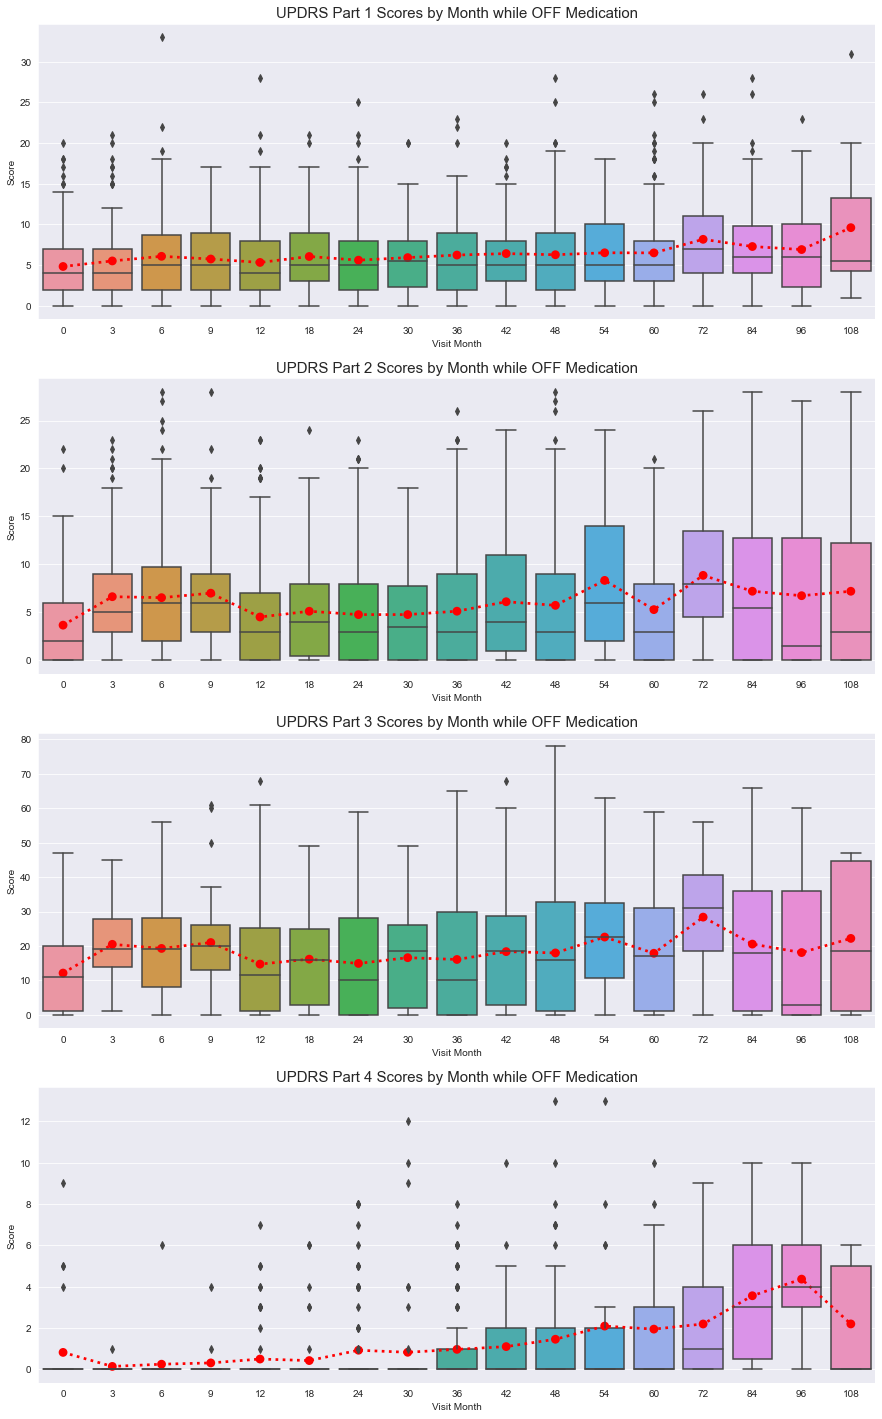

In [25]:
train_clincial_data_copy = train_clinical_data.copy()
train_clincial_data_copy["upd23b_clinical_state_on_medication"] = train_clincial_data_copy["upd23b_clinical_state_on_medication"].fillna("Off")

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 25))

sns.set_style('darkgrid')

axs = axs.flatten()

for x, feature in enumerate(["updrs_1", "updrs_2", "updrs_3", "updrs_4"]):
    ax = axs[x]
    data = train_clincial_data_copy[(train_clincial_data_copy["upd23b_clinical_state_on_medication"] == "Off")]
    _ = sns.boxplot(data=data, x="visit_month", y=feature, ax=ax)
    _ = sns.pointplot(data=data, x="visit_month", y=feature, color="r", ci=None, linestyles=[":"], ax=ax)
    _ = ax.set_title("UPDRS Part {} Scores by Month while OFF Medication".format(x+1), fontsize=15)
    _ = ax.set_xlabel("Visit Month")
    _ = ax.set_ylabel("Score")


![Alt Text](Images_related_to_Parkinson_project\i12.png)

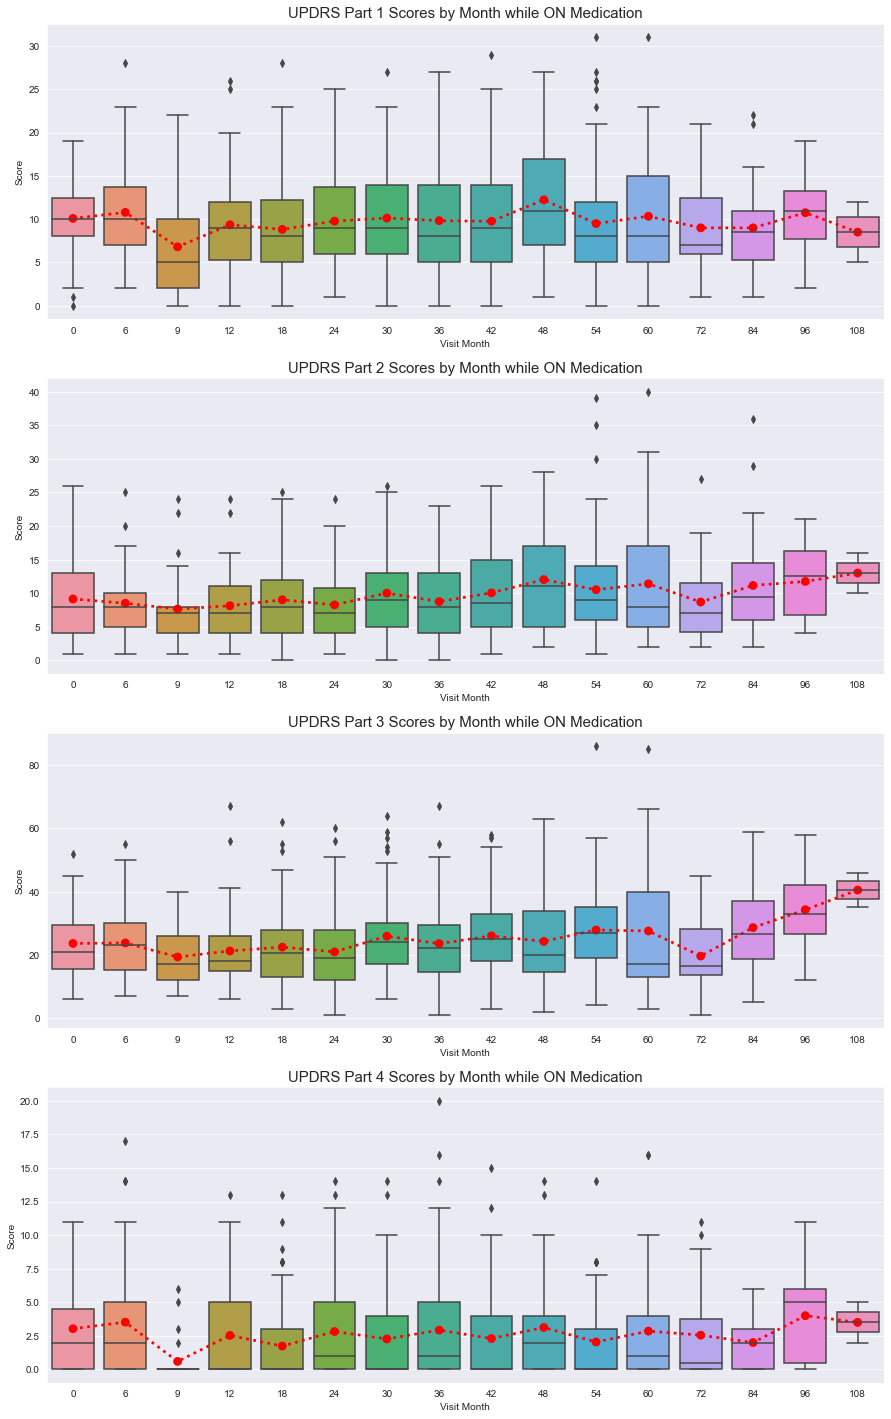

In [26]:
train_clincial_data_copy = train_clinical_data.copy()
train_clincial_data_copy["upd23b_clinical_state_on_medication"] = train_clincial_data_copy["upd23b_clinical_state_on_medication"].fillna("Off")

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 25))

sns.set_style('darkgrid')

axs = axs.flatten()

for x, feature in enumerate(["updrs_1", "updrs_2", "updrs_3", "updrs_4"]):
    ax = axs[x]
    data = train_clincial_data_copy[(train_clincial_data_copy["upd23b_clinical_state_on_medication"] == "On")]
    _ = sns.boxplot(data=data, x="visit_month", y=feature, ax=ax)
    _ = sns.pointplot(data=data, x="visit_month", y=feature, color="r", ci=None, linestyles=[":"], ax=ax)
    _ = ax.set_title("UPDRS Part {} Scores by Month while ON Medication".format(x+1), fontsize=15)
    _ = ax.set_xlabel("Visit Month")
    _ = ax.set_ylabel("Score")

![Alt Text](Images_related_to_Parkinson_project\i13.png)

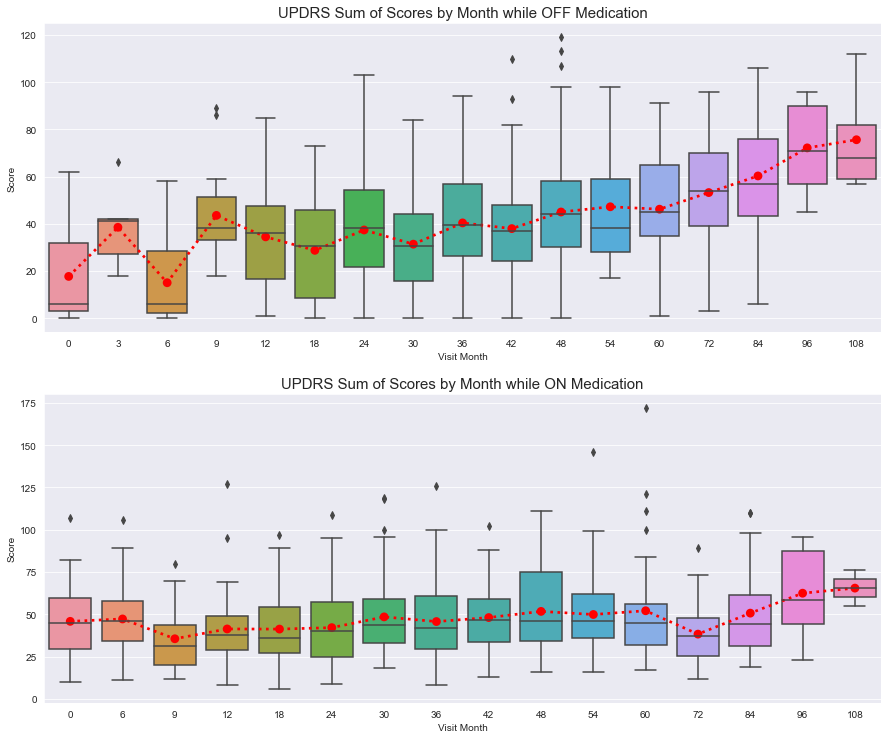

In [27]:
train_clinical_data["updrs_sum"] = train_clinical_data["updrs_1"] + train_clinical_data["updrs_2"] + train_clinical_data["updrs_3"] + train_clinical_data["updrs_4"]
train_clincial_data_copy = train_clinical_data.copy()
train_clincial_data_copy["upd23b_clinical_state_on_medication"] = train_clincial_data_copy["upd23b_clinical_state_on_medication"].fillna("Off")

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 12.5))

axs = axs.flatten()

sns.set_style('darkgrid')

data = train_clincial_data_copy[(train_clincial_data_copy["upd23b_clinical_state_on_medication"] == "Off")]
ax = axs[0]
_ = sns.boxplot(data=data, x="visit_month", y="updrs_sum", ax=ax)
_ = sns.pointplot(data=data, x="visit_month", y="updrs_sum", color="r", ci=None, linestyles=[":"], ax=ax)
_ = ax.set_title("UPDRS Sum of Scores by Month while OFF Medication".format(x+1), fontsize=15)
_ = ax.set_xlabel("Visit Month")
_ = ax.set_ylabel("Score")

data = train_clincial_data_copy[(train_clincial_data_copy["upd23b_clinical_state_on_medication"] == "On")]
ax = axs[1]
_ = sns.boxplot(data=data, x="visit_month", y="updrs_sum", ax=ax)
_ = sns.pointplot(data=data, x="visit_month", y="updrs_sum", color="r", ci=None, linestyles=[":"], ax=ax)
_ = ax.set_title("UPDRS Sum of Scores by Month while ON Medication".format(x+1), fontsize=15)
_ = ax.set_xlabel("Visit Month")
_ = ax.set_ylabel("Score")

When considering the sum of all UPDRS scores while the patient is off medication, there is a clear trend of increasing scores with higher visit months, suggesting disease progression. On the other hand, when the patient is on medication, the trendline remains relatively stable until the visit months exceed 96, where we see an increase in overall scores. This suggests that disease progression continues even when the patient is taking medication. If we combine both ON and OFF medication status:

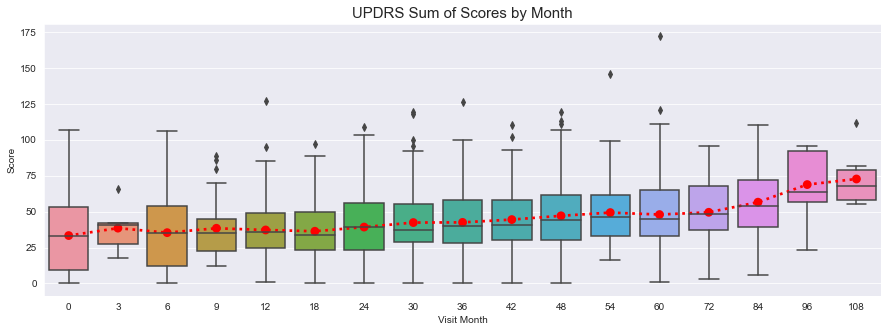

In [28]:
train_clinical_data["updrs_sum"] = train_clinical_data["updrs_1"] + train_clinical_data["updrs_2"] + train_clinical_data["updrs_3"] + train_clinical_data["updrs_4"]
train_clincial_data_copy = train_clinical_data.copy()
train_clincial_data_copy["upd23b_clinical_state_on_medication"] = train_clincial_data_copy["upd23b_clinical_state_on_medication"].fillna("Off")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.set_style('darkgrid')

_ = sns.boxplot(data=train_clincial_data_copy, x="visit_month", y="updrs_sum", ax=ax)
_ = sns.pointplot(data=train_clincial_data_copy, x="visit_month", y="updrs_sum", color="r", ci=None, linestyles=[":"], ax=ax)
_ = ax.set_title("UPDRS Sum of Scores by Month", fontsize=15)
_ = ax.set_xlabel("Visit Month")
_ = ax.set_ylabel("Score")

The trend of increasing UPDRS scores is notable, as it implies that the scores are likely to increase over time rather than decrease. This information can be utilized as a post-processing check to verify the validity of the predictions made by our machine learning algorithms.

## 2.(i).(b). Visit Month vs Protein Data
Without diving too much into the actual protein data, we should check to see if there are general trends regarding the breakdown of protein data by month.

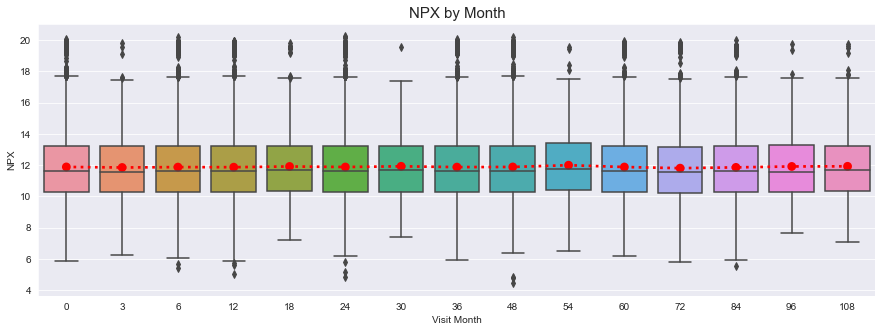

In [29]:
train_protiens_copy = train_protiens.copy()
train_protiens_copy["log_NPX"] = np.log(train_protiens_copy["NPX"])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.set_style('darkgrid')

_ = sns.boxplot(data=train_protiens_copy, x="visit_month", y="log_NPX", ax=ax)
_ = sns.pointplot(data=train_protiens_copy, x="visit_month", y="log_NPX", color="r", ci=None, linestyles=[":"], ax=ax)
_ = ax.set_title("NPX by Month", fontsize=15)
_ = ax.set_xlabel("Visit Month")
_ = ax.set_ylabel("NPX")

The protein expression frequencies remain stable across different categories of months, which is not surprising. However, there is a considerable amount of variability in the actual values of protein expression. This implies that there might be differences in the types of proteins expressed, rather than their absolute quantities.

To investigate whether there are any notable changes in UniProt proteins across the months, we need to look for proteins that have significant increases or decreases. Analyzing all 227 proteins could be challenging, so we will focus on proteins with high standard deviations compared to their mean. Specifically, we will consider protein expression data with a standard deviation greater than 25% of the mean value.

In [30]:
unique_proteins = train_protiens["UniProt"].unique()
unique_months = train_protiens["visit_month"].unique()

protein_dict = dict()
for protein in unique_proteins:
    if protein not in protein_dict:
        protein_dict[protein] = {
            "months": unique_months,
            "count_NPX": [train_protiens[(train_protiens["UniProt"] == protein) & (train_protiens["visit_month"] == month)]["NPX"].count() for month in unique_months],
            "total_NPX": [train_protiens[(train_protiens["UniProt"] == protein) & (train_protiens["visit_month"] == month)]["NPX"].sum() for month in unique_months],
            "avg_NPX": [0 * len(unique_months)],
        }
        
for protein in unique_proteins:
    protein_dict[protein]["avg_NPX"] = [float(total) / count for total, count in zip(protein_dict[protein]["total_NPX"], protein_dict[protein]["count_NPX"])]
    
for protein in unique_proteins:
    protein_dict[protein]["min_NPX"] = min(protein_dict[protein]["avg_NPX"])
    protein_dict[protein]["max_NPX"] = max(protein_dict[protein]["avg_NPX"])
    
for protein in unique_proteins:
    protein_dict[protein]["mean"] = sum(protein_dict[protein]["avg_NPX"]) / len(protein_dict[protein]["months"])
    protein_dict[protein]["std"] = sum([(total_NPX - protein_dict[protein]["mean"]) ** 2 for total_NPX in protein_dict[protein]["avg_NPX"]]) / (len(unique_months) - 1)
    protein_dict[protein]["std"] = protein_dict[protein]["std"] ** 0.5
    
proteins_with_large_std = [protein for protein in unique_proteins if protein_dict[protein]["std"] > (protein_dict[protein]["mean"] * .25)]


''

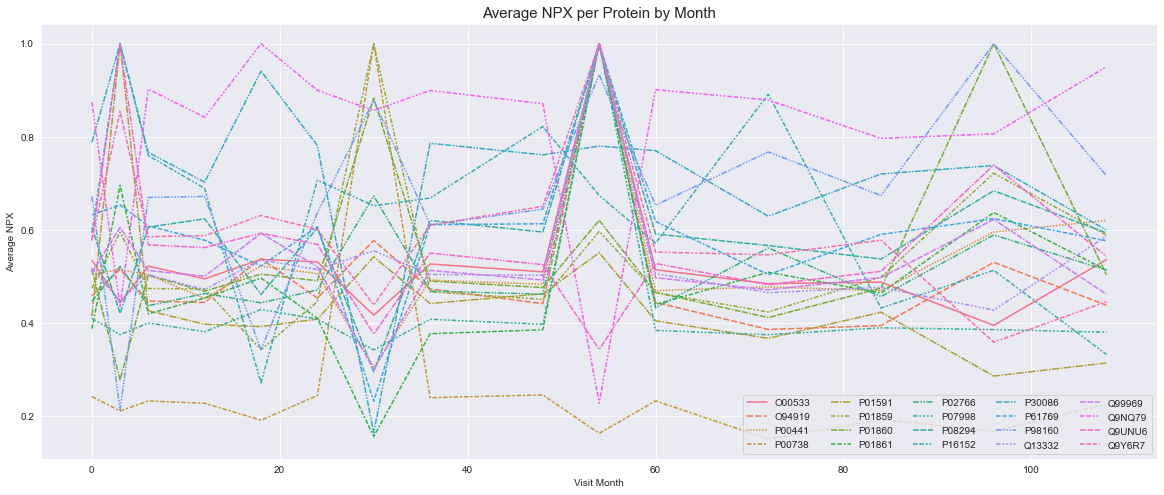

In [31]:
import math

proteins_of_interest_by_month = {
    "UniProt": [],
    "Visit Month": [],
    "Average NPX": [],
}
for protein in proteins_with_large_std:
    for month_index, month in enumerate(unique_months):
        proteins_of_interest_by_month["UniProt"].append(protein)
        proteins_of_interest_by_month["Visit Month"].append(month)
        value = protein_dict[protein]["avg_NPX"][month_index]
        value /= protein_dict[protein]["max_NPX"]
        proteins_of_interest_by_month["Average NPX"].append(value)
        
df = pd.DataFrame(proteins_of_interest_by_month)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 8))

sns.set_style('darkgrid')

_ = sns.lineplot(data=df, x="Visit Month", y="Average NPX", hue="UniProt", style="UniProt", ax=ax)
_ = ax.set_title("Average NPX per Protein by Month", fontsize=15)
_ = ax.set_xlabel("Visit Month")
_ = ax.set_ylabel("Average NPX")
_ = plt.legend(ncol=5)
""

There are several interesting observations to note from the analysis. Firstly, we can see spikes and dips in the average levels of all the proteins of interest at months 30, 54, and 96, which could potentially be correlated with medication state or UPDRS scores. This suggests that there is a correlation between proteins and visit month.

Secondly, some proteins show both upward and downward movements, indicating a positive or negative correlation with UPDRS scores.

Finally, it is important to note that we are only examining protein expression frequencies with large variance (standard deviation > 25% of the mean). There could be other subtle changes in expression frequency that a machine learning algorithm can learn from.


# 2.(ii) Protein UniProt and NPX
While we've started to examine the impact of visit_month on various protein levels, we can also look at the protein expression levels themselves to see if there are correlations between them and UPDRS scores. There are a large number of proteins (227), so we'll first take a look overall before highlighting interesting correlations.

In [32]:
proteins = []
protein_dict = {}
for index, row in train_protiens.iterrows():
    protein = row["UniProt"]
    if protein not in protein_dict:
        protein_dict[protein] = {}
        proteins.append(protein)
    protein_dict[protein][row["visit_id"]] = row["NPX"]
    
peptides = []
peptide_dict = {}
for index, row in train_peptides.iterrows():
    peptide = row["Peptide"]
    if peptide not in peptide_dict:
        peptide_dict[peptide] = {}
        peptides.append(peptide)
    peptide_dict[peptide][row["visit_id"]] = row["PeptideAbundance"]
    
train_copy = train_clinical_data.copy()
for protein in proteins:
    train_copy[protein] = train_copy["visit_id"].apply(lambda visit_id: 0 if visit_id not in protein_dict[protein] else protein_dict[protein][visit_id])
    
for peptide in peptides:
    train_copy[peptide] = train_copy["visit_id"].apply(lambda visit_id: 0 if visit_id not in peptide_dict[peptide] else peptide_dict[peptide][visit_id])

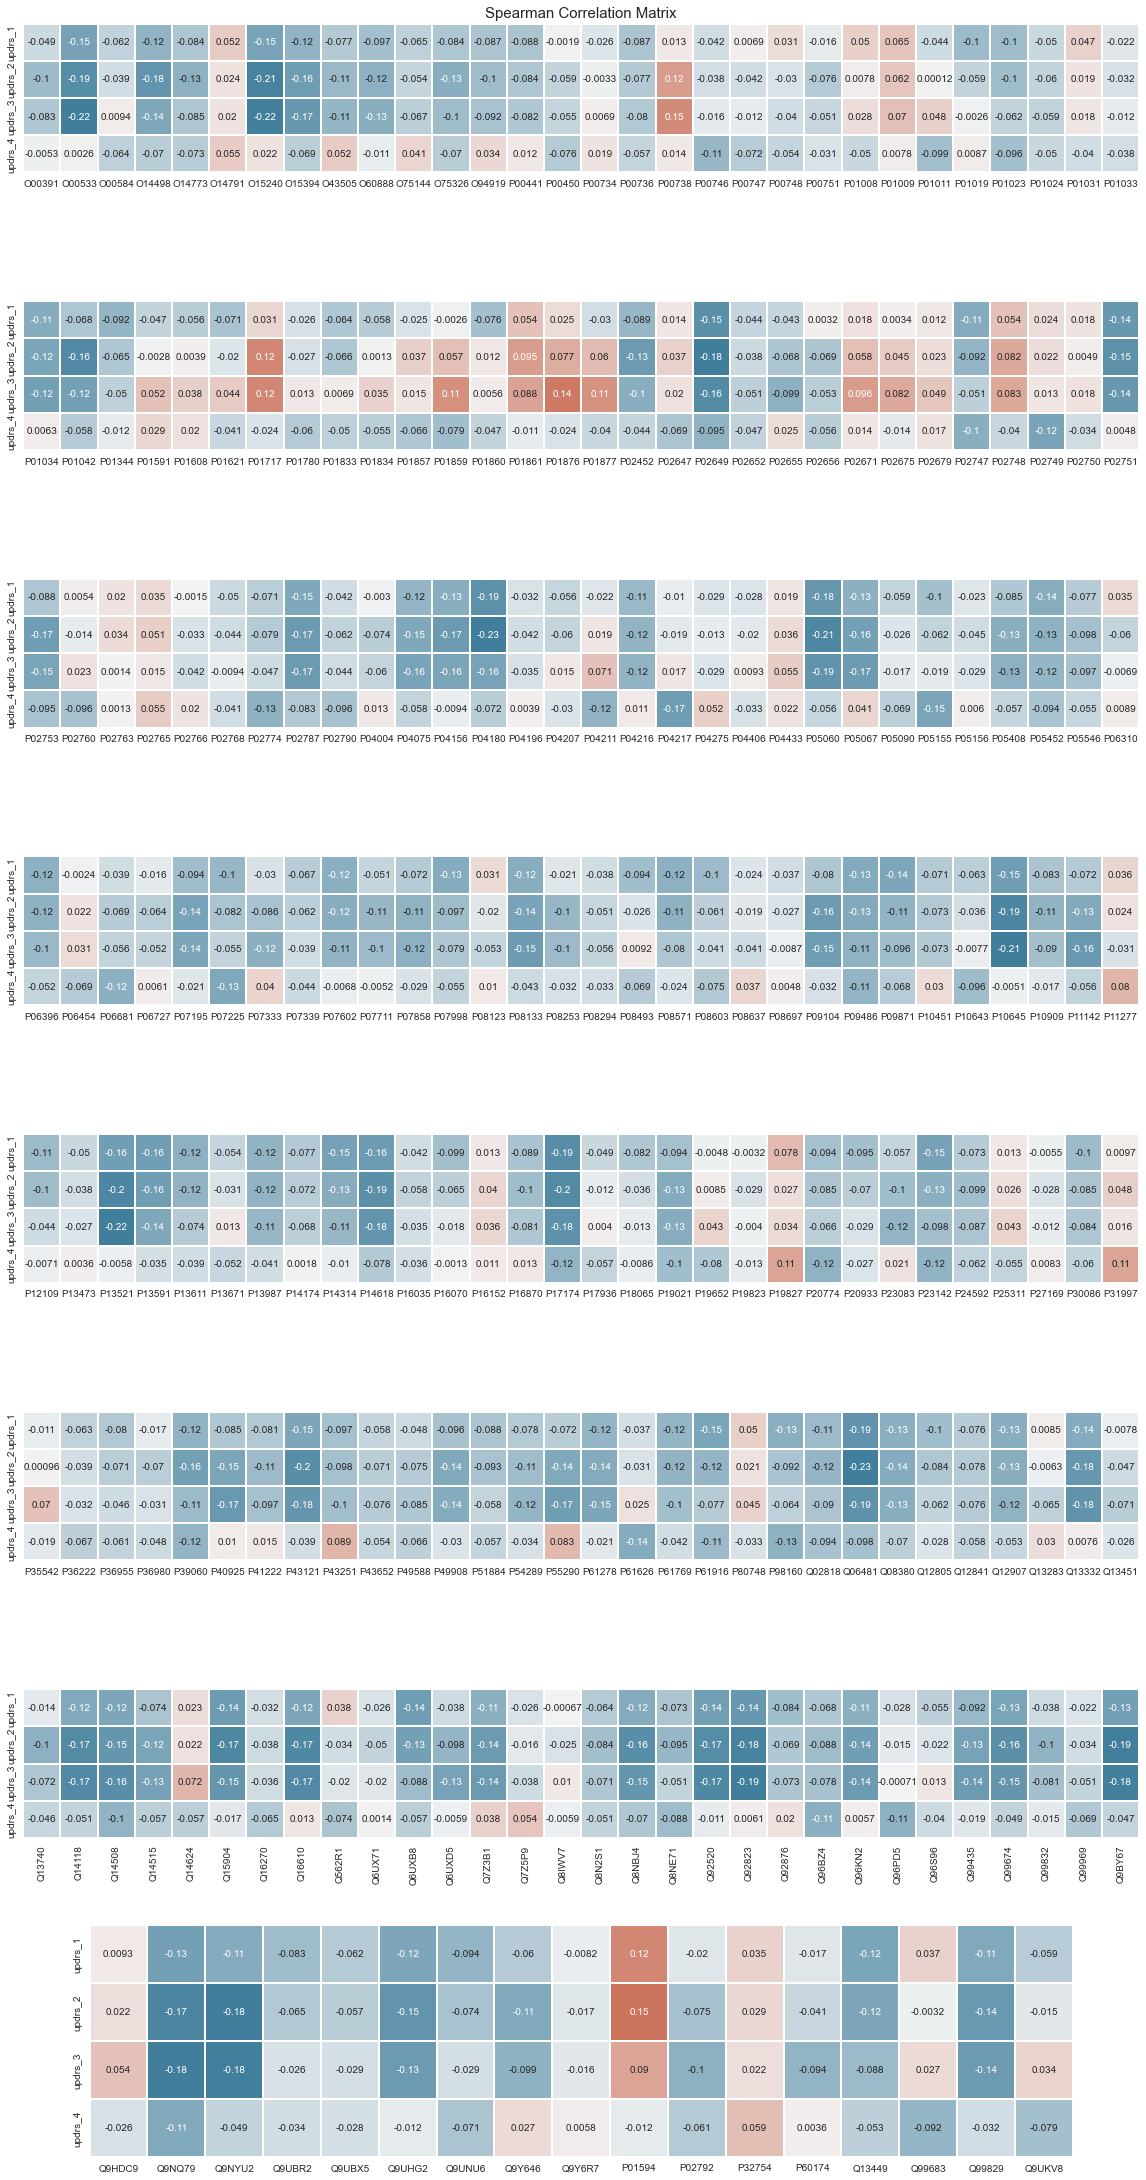

In [33]:
features = []
features.extend(proteins)

# Set missing values to null so our correlation matrix won't include 0 values in the correlation calculation
train_copy[features] = train_copy[features].replace(0.0, np.nan)

features.extend(["updrs_1", "updrs_2", "updrs_3", "updrs_4"])

correlation_matrix = train_copy[features].corr(method="spearman")

from matplotlib.colors import SymLogNorm

fig, axs = plt.subplots(nrows=8, ncols=1, figsize=(20, 40))

axs = axs.flatten()

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,0:30],
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[0], annot=True,
)
_ = axs[0].set_title("Spearman Correlation Matrix", fontsize=15)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,30:60],
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[1], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,60:90],
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[2], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,90:120],
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[3], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,120:150],
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[4], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,150:180],
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[5], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,180:210],
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[6], annot=True,
)

_ = sns.heatmap(
    correlation_matrix.iloc[-4:,210:227],
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0, square=True, linewidths=.1, cbar=False, ax=axs[7], annot=True,
)

There are a lot of proteins to examine with the correlation matrix. Let's start by defining what we would consider to be a somewhat significant correlation (positive or negative). Values that are 0.1 or below are likely to have little correlation to the UPDRS target scores, and are likely just noise. A quick scan reveals that there are several candidates that may not be useful in our regression:
•	O00533

•	O14498

•	O15240

•	O15394

•	O43505

•	O60888

•	P00738

•	P01034

•	P01042

•	P01717

•	P02452

•	P02649

•	P02751

•	P02753

•	P02787

•	P04075

•	P04156

•	P04180

•	P04216

•	P05060

•	P05067

•	P05155

•	P05408

•	P05452

•	P06396

•	P07195

•	P07225

•	P07602

•	P07711

•	P07858

•	P08133

•	P08253

•	P08571

•	P09104

•	P09486

•	P09871

•	P10645

•	P11142

•	P13521

•	P13591

•	P13611

•	P13987

•	P14313

•	P14618

•	P17174

•	P19021

•	P23083

•	P23142

•	P39060

•	P40925

•	P43121

•	P49908

•	P54289

•	P55290

•	P61278

•	P61769

•	P61916

•	P98160

•	Q02818

•	Q06481

•	Q08380

•	Q12907

•	Q13332

•	Q14118

•	Q14508

•	Q14515

•	Q15904

•	Q16610

•	Q6UXB8

•	Q7Z3B1

•	Q8NBJ4

•	Q92520

•	Q92823

•	Q96KN2

•	Q99435

•	Q99674

•	Q9BY67

•	Q9NQ79

•	Q9NYU2

•	Q9UHG2

•	P01594

•	Q13449

•	Q99829

There are some proteins that are weak correlates only to updrs_4. These are:
•	P00746

•	P02749

•	P02774

•	P04211

•	P04217

•	P05155

•	P06681

•	P19827

•	P20774

•	P31997

•	P61626

•	Q96BZ4

•	Q96PD5
The challenge is going to be how we use this knowledge. Our correlation analysis only worked because we were able to ignore 
values that were missing. For machine learning regression to work, we'll need to satisfy one of the following conditions to use 
the data:

•	Have complete records for every protein type for every visit.

•	Figure out a way of imputing missing values.

•	Use a machine learning algorithm that implicitly handles missing data.

Let's take a look at how our proteins appear across visits. Specifically, we know that there are are 2,615 unique visits. The 
question is how much of each protein we see given the total number of visits we have. If we only see a protein three or four 
times, even if it is correlated with an UPDRS score, it's likely not going to help out too much.


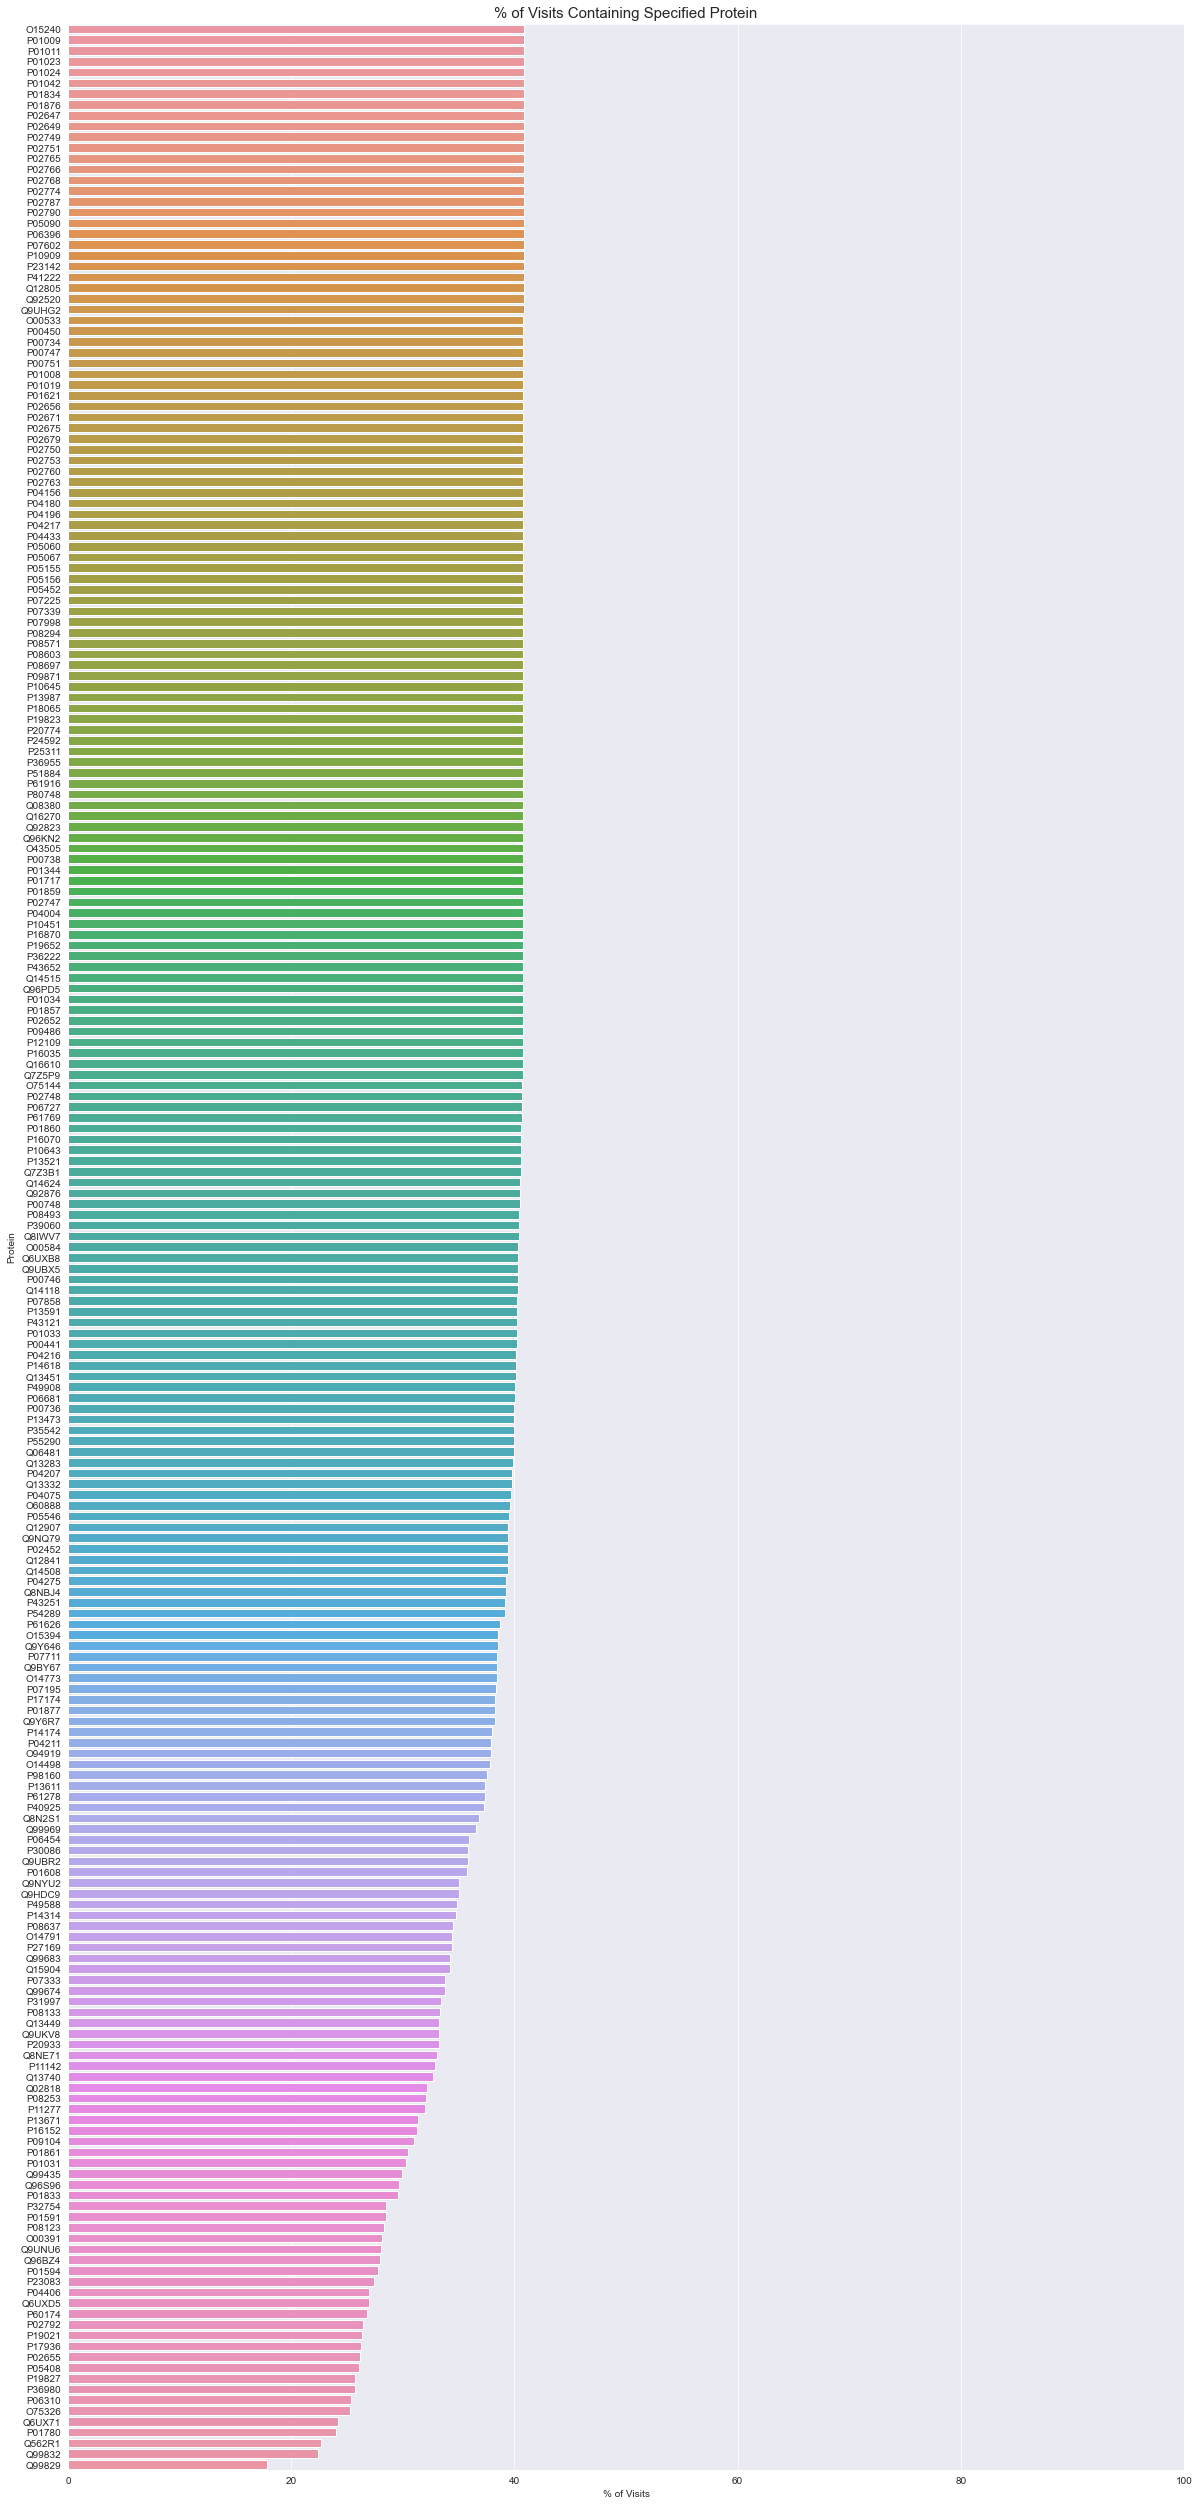

In [34]:
protein_counts = {}

for protein in proteins:
    protein_counts[protein] = float(len(train_copy[(train_copy[protein] > 0.0)][protein])) / len(train_copy[protein]) * 100

protein_counts = dict(sorted(protein_counts.items(), key=lambda x:x[1], reverse=True))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 45))

_ = sns.barplot(y=list(protein_counts.keys()), x=list(protein_counts.values()), ax=ax)
_ = ax.set_title("% of Visits Containing Specified Protein", fontsize=15)
_ = ax.set_ylabel("Protein")
_ = ax.set_xlabel("% of Visits")
_ = ax.set_xlim([0, 100])

The protein data shows that measurements are available for a maximum of 40% of the recorded visits, which poses a challenge for tracking trends. The large number of instances without protein measurements will overshadow the cases where measurements are available, leading to a confounding effect. Furthermore, the visits where these measurements are available may also pose a problem.

In [35]:
protein_month_counts = {}

for protein in proteins:
    protein_month_counts[protein] = {month: 0 for month in range(109)}
    for x in range(109):
        protein_month_counts[protein][x] = len(train_copy[(train_copy[protein] > 0.0) & (train_copy["visit_month"] == x)][protein])

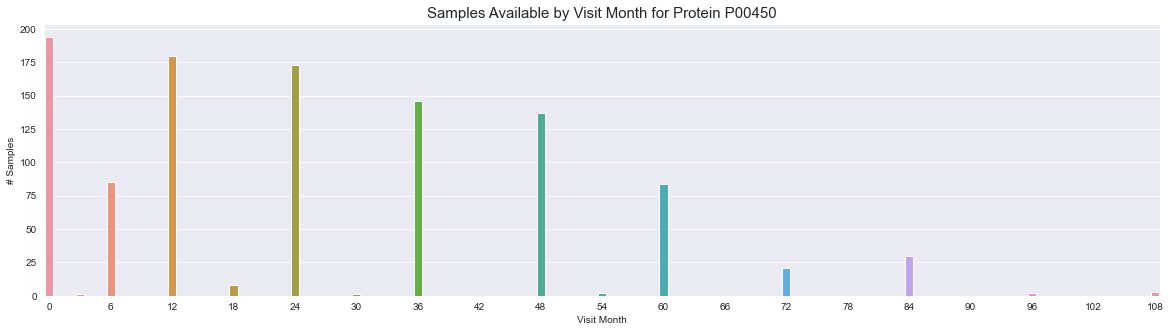

In [36]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))

_ = sns.barplot(x=list(protein_month_counts["P00450"].keys()), y=list(protein_month_counts["P00450"].values()), ax=ax)
_ = ax.set_title("Samples Available by Visit Month for Protein P00450", fontsize=15)
_ = ax.set_ylabel("# Samples")
_ = ax.set_xlabel("Visit Month")
_ = ax.xaxis.set_major_locator(MultipleLocator(6))
_ = ax.xaxis.set_major_formatter('{x:.0f}')
_ = ax.xaxis.set_minor_locator(MultipleLocator(3))

It would be useful to analyze the protein data in terms of patients rather than visits. Specifically, we need to determine the percentage of patients who do not have protein data at each month. Additionally, we need to check whether we have protein measurements available for at least some of our patients in every month or not.

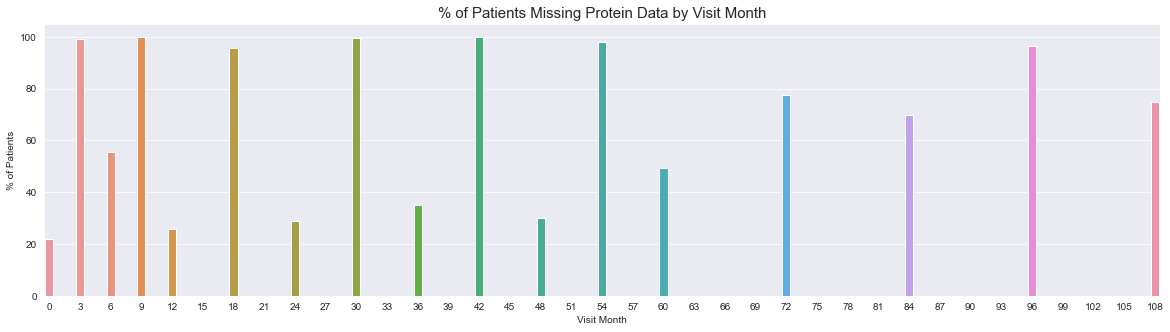

In [37]:
train_copy = train_copy.fillna(0)
train_copy["missing_all"] = train_copy[proteins].apply(lambda x: 1 if sum([y for y in x]) == 0 else 0, axis=1)

missing_month_counts = [train_copy[(train_copy["visit_month"] == x)]["missing_all"].sum() / float(train_copy[(train_copy["visit_month"] == x)]["patient_id"].count()) * 100 for x in range(109)]
missing_month_labels = [x for x in range(109)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))

_ = sns.barplot(x=missing_month_labels, y=missing_month_counts, ax=ax)
_ = ax.set_title("% of Patients Missing Protein Data by Visit Month", fontsize=15)
_ = ax.set_ylabel("% of Patients")
_ = ax.set_xlabel("Visit Month")
_ = ax.xaxis.set_major_locator(MultipleLocator(3))
_ = ax.xaxis.set_major_formatter('{x:.0f}')
_ = ax.xaxis.set_minor_locator(MultipleLocator(3))

We observe that for months 3, 9, 18, 30, 42, 54, and 96, protein data is missing for almost all patients included in the study.

## Agenda : To find Minimum SMAPE Score.
* Several ML and DL Models are benchmarked for clearly predicting early Parkinson's Disease.
*Thus ,Before Finding SMAPE score , lets first optimize the hyperparameters for the best results in the next notebook*



